#  Part 1. Analysis of the 2018 NBI dataset

Each year bridge data is submitted to the FHWA by the States, Federal agencies and Tribal goverments of the United States of America. Each dataset is submitted in the spring, corrected and updated when necessary and finally published in the FHWA website (https://www.fhwa.dot.gov/bridge/nbi/ascii.cfm) at the end of each calendar year.

The purpose of this notebook is to analyze the latest FHWA Bridge Inventory dataset for all the bridges in the United States in the 2018 census.

This analysis will be developed for steel girder and concrete beam bridges, two of the most common deck typologies not only in USA but mainly in the world. 

We will explore the 2018 data and narrow the scope of this analysis by making some assumptions to focus on the topic we want to develop.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 

In [3]:
pd.set_option('display.max_columns',None)

### Import Bridge data

We are creating a dataframe from the zip file obtained from FHWA dataset for all the bridges in the US National Bridge Inventory (NBIs) on 2018.

In [79]:
total18 = pd.read_csv('./data/2018hwybronefiledel.zip',compression = 'zip',sep = ',',encoding='latin-1')

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,5,7,17,31,36,37,38,39,71,73,75,96,98,102,107,108,109,123,124,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
total18.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,HISTORY_037,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,OPEN_CLOSED_POSTED_041,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,LAT_UND_REF_055A,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,CULVERT_COND_062,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,POSTING_EVAL_070,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_CODE_098A,OTHER_STATE_PCNT_098B,OTHR_STATE_STRUC_NO_099,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
0,1,00000000000S702,1,6.0,1.0,04007,0.0,9,53.0,0.0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4007',' 11.4KM NW OF ATMORE AL',99.99,1.500,0.0,0000000000,0.0,31061110.0,87341340.0,3,3,62,62,9,1999.0,2,0,50.0,2014.0,5,9.7,0,30,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,5,0.0,0.0,1,0.0,9.7,14.7,15.0,0.0,0.0,9.7,9.7,99.99,N,0.0,N,0.0,0.0,8,8,7,8,N,2,44.2,2,32.4,7,7,N,5.0,8,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,2017.0,NaN,0.0,NaN,0.0,N,2,NaN,0,1,0.0,2,6,0,1,1.0,0,NaN,Y,8,59.0,2037.0,0.0,Y,6/13/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,145.50
1,1,00000000000S703,1,6.0,1.0,04003,0.0,9,53.0,3004.0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4003',' ON LYNN MCGEE ROAD',99.99,1.100,0.0,0000000000,0.0,31062020.0,87340890.0,3,3,62,62,9,2002.0,2,0,159.0,2017.0,5,6.5,0,0,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,1,0.0,0.0,1,0.0,9.7,12.9,13.6,0.3,0.3,9.1,9.8,99.99,N,0.0,N,0.0,0.0,8,8,7,7,N,2,84.2,2,34.8,7,6,N,5.0,7,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,2017.0,NaN,0.0,NaN,0.0,N,2,NaN,0,1,0.0,2,6,0,8,1.0,0,NaN,Y,8,200.0,2034.0,0.0,Y,6/13/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,133.28
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,0,113.0,27568.0,'UCHEE CREEK ',NaN,'101ST AIRBORNE RD ','3.4 KM S OF SUNSHINE RD ',99.99,0.000,0.0,NaN,NaN,32174328.0,84583800.0,18,3,74,74,9,1942.0,2,0,375.0,2017.0,4,10.4,0,0,0,0,0,1,1,5.0,0,0.0,0.0,A,1,5,1,4,0.0,0.0,3,0.0,7.2,18.3,43.0,0.6,0.6,7.2,9.0,99.99,N,0.0,N,0.0,0.0,5,5,6,6,N,2,51.7,2,37.2,5,4,N,5.0,8,6.0,38.0,1.0,52.8,1017.0,24.0,N,Y60,N,NaN,1017.0,NaN,1.0,1.0,2.0,2017.0,NaN,NaN,NaN,0.0,N,2,NaN,

In [80]:
init_br = total18.shape[0]

In [34]:
print('There are %d bridges in this years NBI dataset and %d columns with different characteristics of each bridge' %(init_br, total18.shape[1]))

There are 616096 bridges in this years NBI dataset and 137 columns with different characteristics of each bridge


In [35]:
print('%d states from the USA have submitted their data to the FHWA' %(len(total18['STATE_CODE_001'].unique())))

53 states from the USA have submitted their data to the FHWA


In [42]:
state_name = {25:'MASSACHUSETTS',
             4:'ARIZONA', 
             8:'COLORADO',
             38:'NORTH DAKOTA', 
             9:'CONNECTICUT', 
             19:'IOWA', 
             26:'MICHIGAN', 
             48:'TEXAS',
             35:'NEW MEXICO',
             17:'ILLINOIS', 
             51:'VIRGINIA',
             23:'MAINE',
             16:'IDAHO',
             36:'NEW YORK',
             56:'WYOMING',
             29:'MISSOURI',
             39:'OHIO',
             28:'MISSISSIPI', 
             11:'DISTRICT OF COLOMBIA',
             21:'KENTUCKY', 
             18:'INDIANA',
             6:'CALIFORNIA',
             47:'TENNESSEE', 
             12:'FLORIDA',
             24:'MARYLAND',
             34:'NEW JERSEY', 
             46:'SOUTH DAKOTA',
             13:'GEORGIA',
             55:'WISCONSIN',
             30:'MONTANA',
             54:'WEST VIGINIA',
             15:'HAWAII', 
             32:'NEVADA', 
             37:'NORTH CAROLINA',
             10:'DELAWARE', 
             33:'NEW HAMPSHIRE', 
             44:'RHODE ISLAND',
             50:'VERMONT', 
             42:'PENNSYLVANIA', 
             5:'ARKANSAS', 
             20:'KANSAS', 
             45:'SOUTH CAROLINA',
             22:'LOUISIANA',
             40:'OKLAHOMA', 
             72:'PUERTO RICO', 
             41:'OREGON',
             21:'MINNESOTA', 
             53:'WASHINGTON', 
             1:'ALABAMA', 
             31:'NEBRASKA',
             2:'ALASKA', 
             49:'UTAH'
               }

In [43]:
# Let's see how many bridges we have from each state

total18['STATE_CODE_001'].map(state_name).value_counts()

TEXAS                   18762
MISSOURI                12166
OKLAHOMA                11173
OHIO                    10137
IOWA                     9672
NEW YORK                 8869
NORTH CAROLINA           8363
ILLINOIS                 7626
KANSAS                   7529
PENNSYLVANIA             7360
VIRGINIA                 6679
NEBRASKA                 6562
WISCONSIN                6130
MISSISSIPI               6064
INDIANA                  5639
GEORGIA                  5306
TENNESSEE                5099
FLORIDA                  4996
MICHIGAN                 4662
ALABAMA                  4149
MINNESOTA                4124
ARKANSAS                 4023
NEW JERSEY               3616
COLORADO                 3513
CALIFORNIA               3131
WEST VIGINIA             3034
SOUTH CAROLINA           2799
MASSACHUSETTS            2771
WASHINGTON               2657
MARYLAND                 2569
MONTANA                  2380
CONNECTICUT              2149
LOUISIANA                2126
OREGON    

In [14]:
list(total18.columns)

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'RECORD_TYPE_005A',
 'ROUTE_PREFIX_005B',
 'SERVICE_LEVEL_005C',
 'ROUTE_NUMBER_005D',
 'DIRECTION_005E',
 'HIGHWAY_DISTRICT_002',
 'COUNTY_CODE_003',
 'PLACE_CODE_004',
 'FEATURES_DESC_006A',
 'CRITICAL_FACILITY_006B',
 'FACILITY_CARRIED_007',
 'LOCATION_009',
 'MIN_VERT_CLR_010',
 'KILOPOINT_011',
 'BASE_HWY_NETWORK_012',
 'LRS_INV_ROUTE_013A',
 'SUBROUTE_NO_013B',
 'LAT_016',
 'LONG_017',
 'DETOUR_KILOS_019',
 'TOLL_020',
 'MAINTENANCE_021',
 'OWNER_022',
 'FUNCTIONAL_CLASS_026',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'TRAFFIC_LANES_UND_028B',
 'ADT_029',
 'YEAR_ADT_030',
 'DESIGN_LOAD_031',
 'APPR_WIDTH_MT_032',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_FLARED_035',
 'RAILINGS_036A',
 'TRANSITIONS_036B',
 'APPR_RAIL_036C',
 'APPR_RAIL_END_036D',
 'HISTORY_037',
 'NAVIGATION_038',
 'NAV_VERT_CLR_MT_039',
 'NAV_HORR_CLR_MT_040',
 'OPEN_CLOSED_POSTED_041',
 'SERVICE_ON_042A',
 'SERVICE_UND_042B',
 'STRUCTURE_KIND_043A',
 '

The FHWA provides a "Recording and Coding Guide for the Structure Inventory and Appraisal of the Nations Bridges" in its website: https://www.fhwa.dot.gov/bridge/mtguide.pdf

This guides allows us to better understand those 137 features engineers use to code the bridges they are inspecting. 

### Clear and Merge Data

We will perform several filters in order to clear our data and get some useful insights. 
The filters will be developed from generic to more specific features.

We will also need to add columns and transform some variables.

Our filters and merge operations will be: 

    

    1) Selecting only bridges: the FHWA inventory includes data on both bridges and culverts.    

    2) Limit the dataset to bridges built after 1900: bridges built before ASTM standards (founded in 1898) would have had inconsistent standards for material acceptance in the bridge.
    
    3) Filtering only the bridges with steel girders and prestressed concrete decks.
    
    4) Focus in one climate zone of the USA for our study
    
    5) Delete impossible data like year of reconstruction after current year.
    
    6) Selecting only the columns we will be interested in.
    
    7) Group categories in some of the categorical variables

    8) Drop duplicates   


In [16]:
#The culverts will be dropped out of our dataset
Image(url= "https://engineeringdiscoveries.com/2019/02/10/what-is-difference-between-bridge-and-culvert/what-is-difference-between-bridge-and-culvert-ohn/", width=500, height=500)

In [81]:
total18 = total18.loc[total18['CULVERT_COND_062'] == 'N']
print('The dataset had %d culverts' %(init_br-total18.shape[0]))

The dataset had 140632 culverts


In [82]:
#Drop bridges built before 1900 due to material standards

total18 = total18.loc[total18['YEAR_BUILT_027'] > 1900]
print('The dataset had %d bridges built before 1900' %(init_br-total18.shape[0]))

The dataset had 145585 bridges built before 1900


In [38]:
# We only want the bridges with steel girders and prestressed concrete beams
# Let's see first which values do the "STRUCTURE KIND" feature can take

total18['STRUCTURE_KIND_043A'].unique()

array([5, 1, 3, 4, 2, 6, 7, 8, 0, 9])

In [83]:
# The item codification is as follows: 
# 3 for steel, 4 for steel continuous, 5 for pre-stressed concrete and 6 for pre-stressed concrete continuous

total18 = total18[(total18['STRUCTURE_KIND_043A'].isin([3,4,5,6]))]
print('The dataset had %d bridges not made of steel or concrete' %(init_br-total18.shape[0]))

The dataset had 297085 bridges not made of steel or concrete


In [84]:
# We only want beams or girders superstructures. 

total18['STRUCTURE_TYPE_043B'].unique()

array([ 5,  1, 10,  3,  2, 12,  9, 22,  0,  4,  6,  7, 21, 15, 14, 11,  8,
       13, 17, 16, 20])

In [85]:
# The item codification is 2 for stringer/multi-beam or girder

total18 = total18[(total18['STRUCTURE_TYPE_043B']==2)]
total18.drop(['STRUCTURE_TYPE_043B'], axis=1, inplace = True)
print('The dataset had %d bridges with deck typologies other than girders' %(init_br-total18.shape[0]))

The dataset had 396740 bridges with deck typologies other than girders


In [88]:
# Drop impossible data like year of reconstruction after year of last inspection (2018) 

total18['YEAR_RECONSTRUCTED_106'].fillna(0, inplace = True)
total18 = total18[total18['YEAR_RECONSTRUCTED_106'] < 2018]

In [89]:
# Drop impossible data like year of reconstruction after year of construction

total18.drop(total18[(total18['YEAR_RECONSTRUCTED_106']!=0) & (total18['YEAR_RECONSTRUCTED_106']<= total18['YEAR_BUILT_027'])].index, inplace = True)

/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [90]:
# Add some features that are more easy to read

# Average daily traffic for trucks
total18['TRUCK_ADT'] = total18['ADT_029']*total18['PERCENT_ADT_TRUCK_109']/100

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [91]:
# Age of bridge
# Will be calculated as 2019 (current year) - the year the bridge was built

total18['AGE'] = total18.apply(lambda row : (2019-row['YEAR_BUILT_027']), axis = 1)

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [92]:
# Let's select only the columns we will work with

descriptive_cols = ['STATE_CODE_001',
                    'STRUCTURE_NUMBER_008',
                    'LAT_016',
                    'LONG_017']

geometric_cols = ['TRAFFIC_LANES_ON_028A',
                  'DEGREES_SKEW_034',
                  'STRUCTURE_KIND_043A',
                  'MAIN_UNIT_SPANS_045',
                  'MAX_SPAN_LEN_MT_048',
                  'STRUCTURE_LEN_MT_049',
                  'DECK_WIDTH_MT_052',
                  'SURFACE_TYPE_108A']

functional_cols = ['YEAR_BUILT_027',
                   'YEAR_RECONSTRUCTED_106',
                   'AGE',
                   'DESIGN_LOAD_031',
                   'TRUCK_ADT']

operational_cols = ['MAINTENANCE_021',
                    'FUNCTIONAL_CLASS_026',
                    'WATERWAY_EVAL_071']

rating_cols = ['DECK_COND_058',
               'SUPERSTRUCTURE_COND_059',
               'SUBSTRUCTURE_COND_060']

In [60]:
cols_interest = descriptive_cols+geometric_cols+functional_cols+operational_cols+rating_cols
cols_interest

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'LAT_016',
 'LONG_017',
 'TRAFFIC_LANES_ON_028A',
 'DEGREES_SKEW_034',
 'STRUCTURE_KIND_043A',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'YEAR_BUILT_027',
 'YEAR_RECONSTRUCTED_106',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060']

In [93]:
# Let's reduce the dataset to those columns

total18_fil = total18[cols_interest]

In [94]:
total18_fil.sample(5)

,STATE_CODE_001,STRUCTURE_NUMBER_008,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,DEGREES_SKEW_034,STRUCTURE_KIND_043A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
116059,17,16282500000000,41343844.0,87352110.0,2,50,4,10,42.4,367.6,13.2,N,2007.0,0.0,12.0,5,0.00,31,11,N,7,8,7
195941,20,690575003120,39545479.0,99384473.0,2,0,3,1,14.1,14.3,7.9,6,2000.0,0.0,19.0,5,0.00,2,9,5,8,7,7
431035,40,220600000000000,36390791.0,98351296.0,2,30,5,3,21.3,64.8,8.7,6,1988.0,0.0,31.0,5,11.25,2,7,8,7,8,7
344449,34,3800015,40511480.0,73574900.0,4,2,3,1,13.4,14.9,25.0,6,1964.0,0.0,55.0,5,451.00,26,14,N,6,6,5
101161,13,19750290,32320153.0,84361594.0,2,0,5,1,22.9,71.6,13.2,1,2005.0,0.0,14.0,6,118.20,1,7,6,7,7,7


In [95]:
print('The filtered dataset has %d bridges and %d features' %(total18_fil.shape[0],total18_fil.shape[1]))

The filtered dataset has 219311 bridges and 23 features


In [96]:
total18_fil.dtypes

STATE_CODE_001               int64
STRUCTURE_NUMBER_008        object
LAT_016                    float64
LONG_017                   float64
TRAFFIC_LANES_ON_028A        int64
DEGREES_SKEW_034             int64
STRUCTURE_KIND_043A          int64
MAIN_UNIT_SPANS_045          int64
MAX_SPAN_LEN_MT_048        float64
STRUCTURE_LEN_MT_049       float64
DECK_WIDTH_MT_052          float64
SURFACE_TYPE_108A           object
YEAR_BUILT_027             float64
YEAR_RECONSTRUCTED_106     float64
AGE                        float64
DESIGN_LOAD_031             object
TRUCK_ADT                  float64
MAINTENANCE_021              int64
FUNCTIONAL_CLASS_026         int64
WATERWAY_EVAL_071           object
DECK_COND_058               object
SUPERSTRUCTURE_COND_059     object
SUBSTRUCTURE_COND_060       object
dtype: object

In [67]:
object_cols = ['SURFACE_TYPE_108A','DESIGN_LOAD_031','WATERWAY_EVAL_071','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']

In [97]:
# Convert the columns with no type to numeric values

for col in object_cols:
    total18_fil[col] = pd.to_numeric(total18_fil[col], errors='coerce')
    total18_fil[col] = total18_fil[col].astype('float64')
    

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [69]:
# Grouping categories in some variables

In [98]:
# Structure Type - ITEM 43A
code_struc = {3:'steel',4:'steel',5:'concrete',6:'concrete'}
total18_fil['STRUCTURE_KIND_043A'] = total18_fil['STRUCTURE_KIND_043A'].map(code_struc)

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


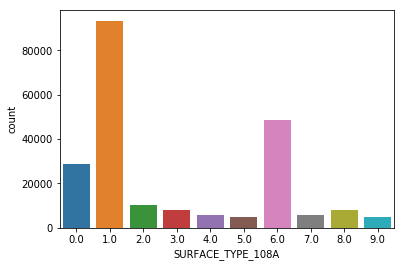

In [99]:
# Wearing surface - ITEM 108
sns.countplot(total18_fil['SURFACE_TYPE_108A'])

In [100]:
code_ws = {1:'concrete',2:'concrete',3:'concrete',4:'concrete',
          6:'bituminous', 0:'none'}

total18_fil['SURFACE_TYPE_108A'] = total18_fil['SURFACE_TYPE_108A'].map(code_ws)

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


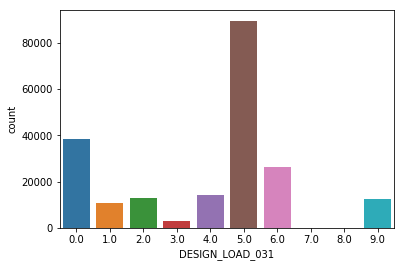

In [101]:
# Design Load - ITEM 31
sns.countplot(total18_fil['DESIGN_LOAD_031'])

In [102]:
code_truck = {0:'other',7:'other',8:'other',
              1:'light',2:'light',3:'light',4:'light',
              5:'heavy',6:'heavy',9:'heavy'}

total18_fil['DESIGN_LOAD_031'] = total18_fil['DESIGN_LOAD_031'].map(code_truck)

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [103]:
# Maintenanace Responsability - ITEM 21
code_resp = {1:'stateHA',2:'countyHA',3:'town_cityHA',4:'town_cityHA',31:'tollA',32:'tollA'}
total18_fil['MAINTENANCE_021'] = total18_fil['MAINTENANCE_021'].map(code_resp)
total18_fil['MAINTENANCE_021'].fillna('otherA', inplace = True)

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [104]:
# Functional Classification - ITEM 26
code_class = {1:'rural',2:'rural',6:'rural',7:'rural',8:'rural',9:'rural',
              11:'urban',12:'urban',14:'urban',16:'urban',17:'urban',19:'urban'}
total18_fil['FUNCTIONAL_CLASS_026'] = total18_fil['FUNCTIONAL_CLASS_026'].map(code_class)

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [106]:
# Waterway - ITEM 71
code_water = {9:'low',8:'low',
              7:'high',6:'high',5:'high',4:'high',3:'high',2:'high',
              np.nan:'none'}

total18_fil['WATERWAY_EVAL_071'] = total18_fil['WATERWAY_EVAL_071'].map(code_water)

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [107]:
# We will also change the Year reconstructed column with a pair of values:
# 1 if reconstruction has been necessary and 0 if not

total18_fil['RECONSTRUCTED'] = total18_fil.apply(lambda row: 1 if row['YEAR_RECONSTRUCTED_106']>0
                                                else 0, axis = 1)

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [108]:
# Drop null values
total18_fil.dropna(inplace = True)

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
total18_fil.shape

(175596, 24)

In [110]:
# Convert the latitude and longitude dimensions to decimal degrees 

def conv_decdeg(num):
    a = pd.to_numeric(str(num)[:-6])
    b = pd.to_numeric((str(num)[-6:-4]))/60
    c = pd.to_numeric(str(num)[-4:])/(100*3600)
    val = (a+b+c)/100
    return val

def get_new_l(df,func):
    
    # Transform values to integers
    df['LONG_017'] = pd.to_numeric(df['LONG_017'],downcast = 'signed')
    df['LAT_016'] = pd.to_numeric(df['LAT_016'],downcast = 'signed')

    # Apply function to get values in decimal degrees
    df['LONGITUDE'] = -df['LONG_017'].apply(func)
    df['LATITUDE'] = df['LAT_016'].apply(func)
    
get_new_l(total18_fil,conv_decdeg)

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [111]:
# Drop coordinates outside the USA

total18_fil = total18_fil[total18_fil['LONGITUDE'].between(-175,-64)]
total18_fil = total18_fil[total18_fil['LATITUDE'].between(16,56)]

In [112]:
# Drop former longitude and latitude columns

total18_fil.drop(['LAT_016', 'LONG_017'], axis=1, inplace = True)

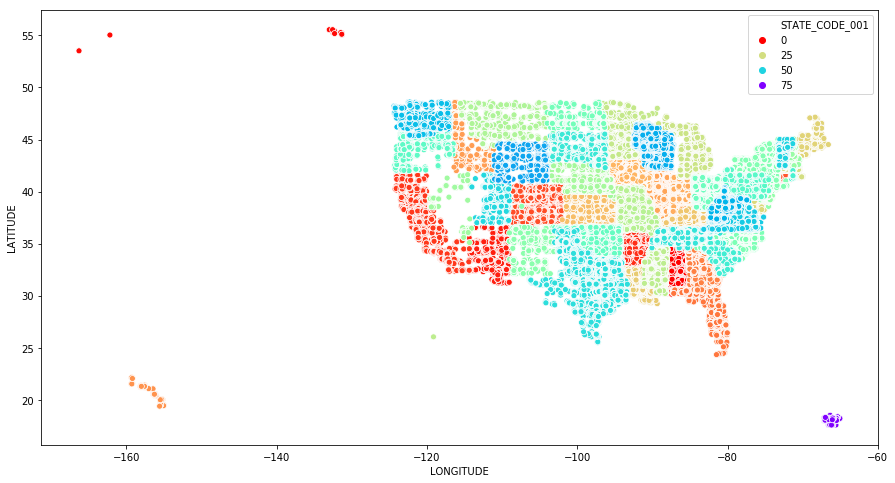

In [113]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE',data = total18_fil, hue='STATE_CODE_001',palette = 'rainbow_r')

The scatter plot of longitude and latitude looks like a United States map, including the islands like Hawaii and Puerto Rico, and also several points in Alaska.

In [114]:
categorical_cols = [
 'STRUCTURE_KIND_043A',
 'SURFACE_TYPE_108A',
 'DESIGN_LOAD_031',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060']

for col in categorical_cols:
    values = total18_fil[col].unique()
    print("The values of %s column are: %s" %(col, values))

The values of STRUCTURE_KIND_043A column are: ['steel' 'concrete']
The values of SURFACE_TYPE_108A column are: ['bituminous' 'concrete' 'none']
The values of DESIGN_LOAD_031 column are: ['heavy' 'other' 'light']
The values of MAINTENANCE_021 column are: ['otherA' 'town_cityHA' 'countyHA' 'stateHA' 'tollA']
The values of FUNCTIONAL_CLASS_026 column are: ['urban' 'rural']
The values of WATERWAY_EVAL_071 column are: ['none' 'high' 'low']
The values of DECK_COND_058 column are: [6. 4. 7. 8. 5. 3. 9. 2. 0. 1.]
The values of SUPERSTRUCTURE_COND_059 column are: [7. 4. 6. 5. 3. 2. 8. 9. 0. 1.]
The values of SUBSTRUCTURE_COND_060 column are: [7. 4. 5. 6. 2. 3. 8. 9. 1. 0.]


In [115]:
# Since we are looking for joining all the datasets with this one by using the Structure number, we should first check that there are no duplicates on it

total18_fil['STRUCTURE_NUMBER_008'].duplicated().value_counts()

False    167720
True       7543
Name: STRUCTURE_NUMBER_008, dtype: int64

In [120]:
dupl_rows = total18_fil[total18_fil.duplicated(['STRUCTURE_NUMBER_008'])]
dupl_rows['STATE_NAME'] =  dupl_rows['STATE_CODE_001'].map(state_name)
dupl_rows['STATE_NAME'].value_counts()

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


VIRGINIA          2127
PENNSYLVANIA      1742
SOUTH CAROLINA    1274
MISSOURI           772
IOWA               419
MICHIGAN           407
NORTH CAROLINA     251
RHODE ISLAND       152
INDIANA            125
NEW MEXICO         120
ARKANSAS            57
ARIZONA             22
IDAHO               14
OHIO                12
NEW YORK            10
KANSAS               6
MAINE                4
OKLAHOMA             4
NEW JERSEY           3
SOUTH DAKOTA         2
PUERTO RICO          2
TEXAS                1
Name: STATE_NAME, dtype: int64

In [126]:
(100*dupl_rows.groupby('STATE_CODE_001').count()/total18_fil.groupby('STATE_CODE_001').count()).dropna()['STRUCTURE_NUMBER_008'].sort_values(ascending = False)

Series([], Name: STRUCTURE_NUMBER_008, dtype: float64)

In South Carolina almost half of the bridges were duplicated (48%). We are also loosing a big part of the data in Pennsylvania and Rhode Island.

In [122]:
# Before dropping all the duplicated values, let's calculate the percentage of data lost

(100*dupl_rows.groupby('STATE_CODE_001').count()/total18_fil.groupby('STATE_CODE_001').count()).dropna()['STRUCTURE_NUMBER_008'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: STRUCTURE_NUMBER_008, dtype: float64

However, the median of loss is less than 2% of the bridges, so will drop the duplicated values.

In [130]:
# Drop duplicates

total18_fil.drop_duplicates(subset='STRUCTURE_NUMBER_008', inplace = True)

In [133]:
print('The number of bridges left are %d' %total18_fil.shape[0])

The number of bridges left are 167720


The United States are divided into 8 different climate zones and 3 moisture categories. The climate region definitions are based on heating degree days, average temperatures, and precipitation and divide the US map as follows according to energy.gov website: 

<img src = './Determining Climate Regions by County .png'>

We will focus in analysing one type of climate of the USA. For this project purpose, we will take Zones 5 and 6 with Moist type A, also called Cold regions. 

With this filter we will be evaluating the following states (from left to right on the green and blue regions): Nebraska (31), Iowa (19), Ohio (39), Pennsylvania (42), New York (36), Vermont (50) and New Hampshire (33). 

We will drop Illinois, Michigan and Indiana from the list since only half of their territory is in this climate zone.

In [139]:
total18_clim = total18_fil[total18_fil['STATE_CODE_001'].isin([31,19,39,42,36,50,33])]
print('By filtering the data by climate region, the number of bridges left are %d' %total18_clim.shape[0])

By filtering the data by climate region, the number of bridges left are 33137


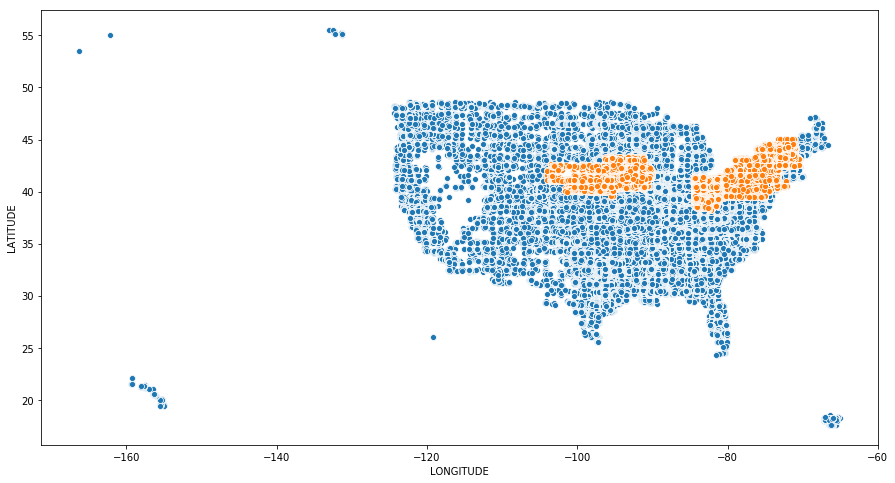

In [140]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE',data = total18_fil)
sns.scatterplot(x='LONGITUDE', y='LATITUDE',data = total18_clim)

The orange region represents the states we will be working on.

### Save to csv


In [141]:
total18_clim.to_csv (r'./total18_clim.csv', index = None, header=True)